In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [13]:
FIXED_FEE = {
    'weekdays': 3,
    'holydays': 4.5,
    'nights': 6.5
}
PROGRESSIVE_FARE = {
    'T1': 1.1,
    'T2': 1.3,
    'T3': 1.6
}
FARES_TRESHOLDS = {
    'weekdays': (14, 27),
    'holydays': (15.5, 28.5),
    'nights': (17.5, 30.5)
}
DISCOUNT = 0.1  # 10% discount
MAXIMUM_COST = 70  # maximum fee for Fiumicino airport
FUEL_COST = 1.8  # euros per liter
FUEL_CONSUMPTION = 0.1  # liters per km
MINIMUM_DISTANCE = 3  # km
MAXIMUM_DISTANCE = 40  # km 
MINIMUM_SPEED = 20  # km/h
MAXIMUM_SPEED = 60  # km/h

DAILY_WORKTIME = 5  # hours
WORKING_DAYS = 5  # days per week
WORKING_WEEKS = 42  # weeks per year
 

In [14]:
def generate_ride():
    distance = np.random.uniform(MINIMUM_DISTANCE, MAXIMUM_DISTANCE)
    ride_type = np.random.choice(list(FIXED_FEE.keys()))
    discount = np.random.choice((True, False))
    return distance, ride_type, discount

def compute_fuel_cost(distance):
    return distance * FUEL_CONSUMPTION * FUEL_COST

def compute_ride_cost_and_fuel_cost(ride):
    distance, ride_type, discount = ride
    fuel_cost = compute_fuel_cost(distance)
    time = 0  # hours
    cost = FIXED_FEE[ride_type]
    for km in range(int(distance)):
        speed = np.random.uniform(MINIMUM_SPEED, MAXIMUM_SPEED)
        time += 1 / speed
        if cost < FARES_TRESHOLDS[ride_type][0]:
            cost += PROGRESSIVE_FARE['T1']
        elif cost < FARES_TRESHOLDS[ride_type][1]:
            cost += PROGRESSIVE_FARE['T2']
        else:
            cost += PROGRESSIVE_FARE['T3']
    if discount:
        cost = cost * (1 - DISCOUNT)
    cost = min(cost, MAXIMUM_COST)
    return cost, fuel_cost, time

def simulate_day():
    daily_revenues = 0
    total_time = 0
    number_of_rides = 0
    daily_distance = 0
    daily_fuel_cost = 0
    rides_data = []
    while total_time < DAILY_WORKTIME:
        ride = generate_ride()
        cost, fuel_cost, time = compute_ride_cost_and_fuel_cost(ride)
        daily_revenues += cost
        daily_distance += ride[0]
        total_time += time
        daily_fuel_cost += fuel_cost
        number_of_rides += 1
        ride_data = {
            'distance (km)': round(ride[0], 2),
            'ride_type': ride[1],
            'discount (10%)': ride[2],
            'cost (€)': round(cost, 2),
            'fuel_cost (€)': round(fuel_cost, 2),
            'time (h)': round(time, 2)
        }
        rides_data.append(ride_data)
    daily_data = {
        'daily_revenues (€)': round(daily_revenues, 2),
        'daily_distance (km)': round(daily_distance, 2),
        'total_time (h)': round(total_time, 2),
        'number_of_rides': number_of_rides,
        'fuel_cost (€)': round(daily_fuel_cost, 2)
    }
    return rides_data, daily_data    

In [15]:
# Simulation
data_rides = []
data_days = []
total_number_of_days = WORKING_DAYS * WORKING_WEEKS
for day in range(total_number_of_days):
    rides_data, daily_data = simulate_day()
    data_rides.extend(rides_data)
    data_days.append(daily_data)
    
# Create dataframes
df_rides = pd.DataFrame(data_rides)
df_rides['time (min)'] = df_rides['time (h)'] * 60
df_days = pd.DataFrame(data_days)

print('Total annual rides:', df_rides.shape[0])
print('Total annual revenues:', round(df_days['daily_revenues (€)'].sum(), 2), '€')	
print('Total annual distance:', round(df_days['daily_distance (km)'].sum(), 2), 'km')
print('Total annual fuel cost:', round(df_days['fuel_cost (€)'].sum(), 2), '€')
print('Total annual revenues minus fuel cost:',
      round(df_days['daily_revenues (€)'].sum() - df_days['fuel_cost (€)'].sum(), 2), '€')
print('Daily average revenues:', round(df_days['daily_revenues (€)'].mean(), 2), '€')

Total annual rides: 1967
Total annual revenues: 58248.02 €
Total annual distance: 41916.21 km
Total annual fuel cost: 7544.91 €
Total annual revenues minus fuel cost: 50703.11 €
Daily average revenues: 277.37 €


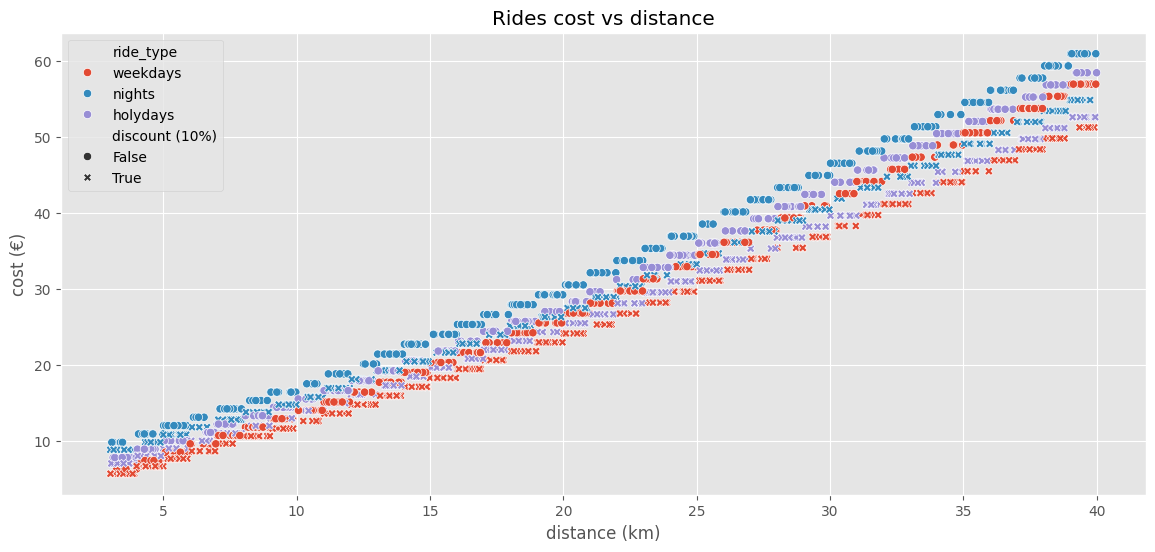

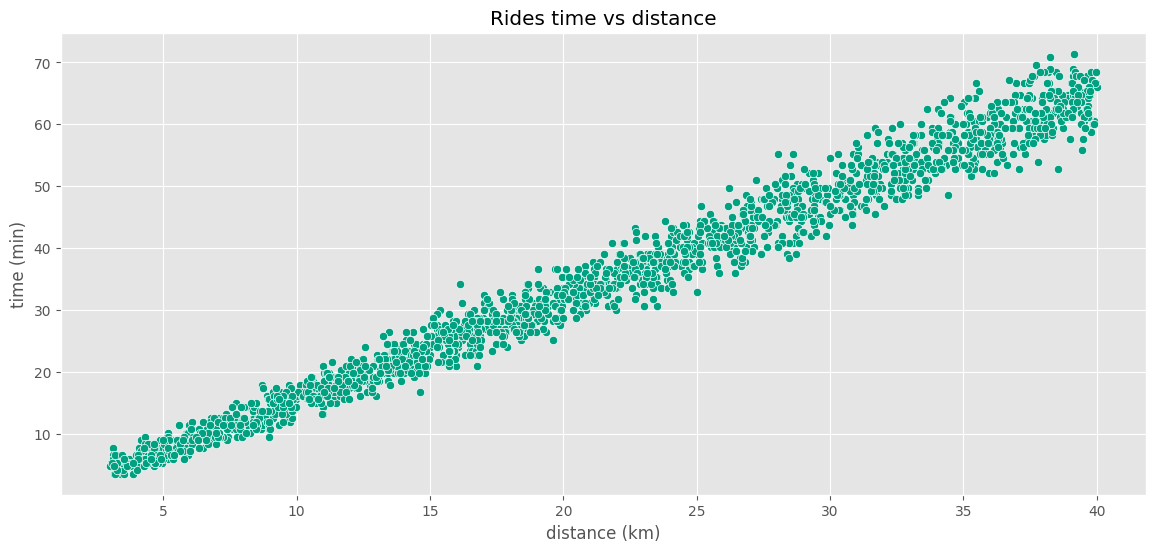

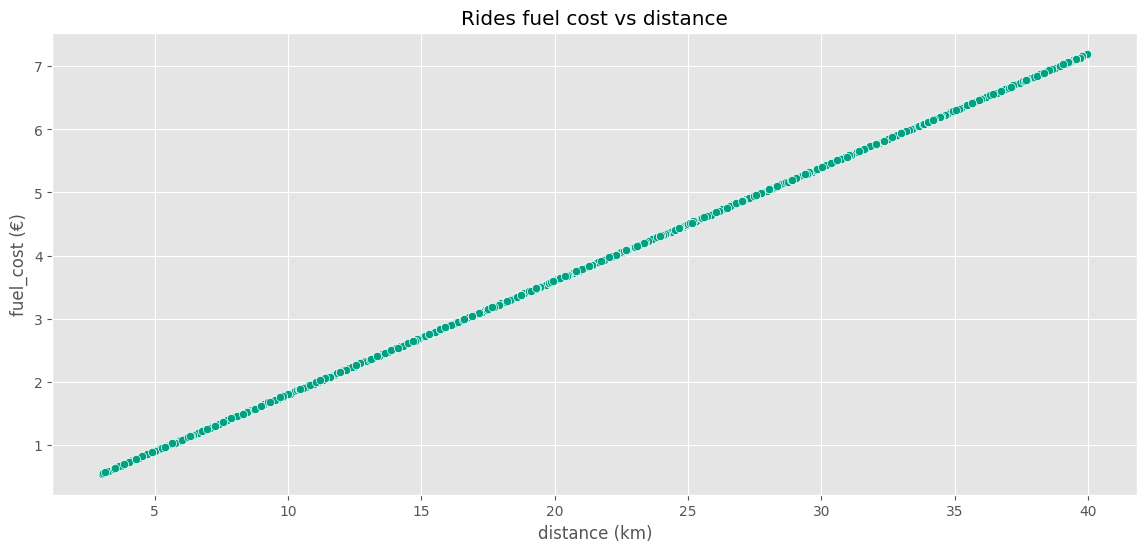

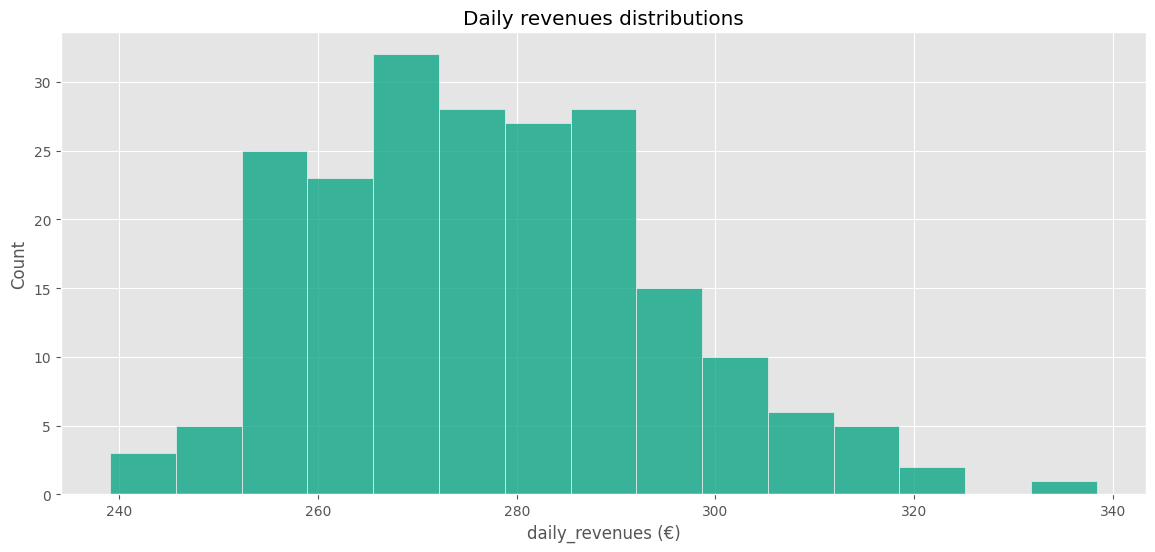

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Rides cost vs distance')
sns.scatterplot(data=df_rides, x='distance (km)', y='cost (€)', hue='ride_type', style='discount (10%)', ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Rides time vs distance')
sns.scatterplot(data=df_rides, x='distance (km)', y='time (min)', ax=ax, color='#00a181')
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Rides fuel cost vs distance')
sns.scatterplot(data=df_rides, x='distance (km)', y='fuel_cost (€)', ax=ax, color='#00a181')
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Daily revenues distributions')
sns.histplot(data=df_days, x='daily_revenues (€)', ax=ax, color='#00a181', bins=15)
plt.show()